## Pandas의 DataFrame

1) 2차원 데이터
- Series: 인덱스가 하나인 1차원 데이터 타입
- DataFrame: 인덱스가 둘인 2차원 데이터 타입
             (데이터 타입 제한 X)

In [2]:
# Pandas 라이브러리 임포트
import pandas as pd 
from pandas import Series, DataFrame

2) 로우 인덱스와 컬럼 인덱스
- 로우 인덱스: 데이터 간에 순서가 존재
               숫자 인덱스나 문자 인덱스로 색인 가능
- 컬럼 인덱스: 데이터 간에 순서가 존재하지 않음
               순서를 통해서 컬럼 색인 불가능
- 둘의 차이점: 대부분의 함수에서 axis(축) 인자 제공
               (axis=0이면 로우 인덱스, axis=1이면 컬럼 인덱스)

In [4]:
# 1. 빈 데이터프레임 생성
DataFrame()

""


- 로우 인덱스와 컬럼 인덱스를 지정할 때 데이터의 모양과 개수에 맞게 지정

In [4]:
# 2. 데이터프레임 생성하고 데이터 할당하기
df2 = DataFrame(data = [[1,2,3],
                 ['kim','park','lee'],
                 [1.5,3.2,9.1]],
               index = ['A','B','C'],
               columns = ['X','Y','Z'])
df2

,X,Y,Z
A,1,2,3
B,kim,park,lee
C,1.5,3.2,9.1


In [11]:
# 인덱스 변경
df2.index = ['AA','BB','CC']
df2.columns = ['XX','YY','ZZ']
df2

,XX,YY,ZZ
AA,1,2,3
BB,kim,park,lee
CC,1.5,3.2,9.1


- 사전 타입의 키 = 컬럼

In [5]:
# 3. 사전 타입 데이터를 이용하여 데이터 프레임 생성하기
인구통계 = {'서울': [950, 945, 938.5],
        '대전':[50, 151, 145],
        '대구':[85, 88, 92],
        '부산':[180, 187, 192],
        '광주':[74, 80, 80]
      }

In [6]:
df3 = DataFrame(data = 인구통계,
               index = [2018, 2019, 2020])
df3

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


### 2.2.2. DataFrame 속성 조회하기 (속성을 조회할 때에는 ()를 사용하지 않으니 유의)

In [7]:
#1. index : 데이터프레임의 인덱스를 리스트로 반환
df2.index

Index(['A', 'B', 'C'], dtype='object')

In [8]:
#2. columns : 데이터프레임의 컬럼을 리스트로 반환
df2.columns

Index(['X', 'Y', 'Z'], dtype='object')

In [10]:
#3. values : 데이터프레임의 데이터 반환 (ndarray)
df3.values

array([[950. ,  50. ,  85. , 180. ,  74. ],
       [945. , 151. ,  88. , 187. ,  80. ],
       [938.5, 145. ,  92. , 192. ,  80. ]])

In [11]:
#4. shape : 행(row)과 열(column)의 개수(차원)을 튜플로 반환
df3.shape

(3, 5)

In [12]:
#5. T (Transpose) : 행과 열을 바꾸기.
df3.T

,2018,2019,2020
서울,950.0,945.0,938.5
대전,50.0,151.0,145.0
대구,85.0,88.0,92.0
부산,180.0,187.0,192.0
광주,74.0,80.0,80.0


In [13]:
#6. axes : 행과 열 이름을 리스트로 반환
df3.axes

[Int64Index([2018, 2019, 2020], dtype='int64'),
 Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')]

In [16]:
#7. dtypes : 컬럼별 데이터타입 반환
df3.dtypes

서울    float64
대전      int64
대구      int64
부산      int64
광주      int64
dtype: object

- 데이터 프레임은 시리즈의 묶음이며, 컬럼별로 시리즈가 생성됨
- df3의 경우, 서울 컬럼의 값만 실수형 데이터가 존재하고 나머지는 모두 정수형 타입
- Python은 변수에 값을 할당하면, 값의 형태에 따라 자동으로 데이터 타입 지정

In [18]:
#8. size : DataFrame의 원소의 개수를 반환
#df3은 3x5해서 15
df3.size

15

### 2.2.3. 데이터프레임 기본 함수

- DataFrame: 기본적으로 인자값을 지정해줄 수도 있고, 지정 안 할 수도 있음
- 대부분의 인자들은 기본값이 지정되어있음

In [19]:
#1. info() - 기본 정보 출력
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2018 to 2020
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      3 non-null      float64
 1   대전      3 non-null      int64  
 2   대구      3 non-null      int64  
 3   부산      3 non-null      int64  
 4   광주      3 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 252.0 bytes


- pandas의 단점: numpy보다 메모리 사용량이 많음

In [20]:
#2. describe() - 기본 통계 정보 출력
#숫자형 데이터만 통계 처리가 가능하므로,
#describe() 함수는 숫자형 컬럼들의 통계 정보만 제공
df3.describe()

,서울,대전,대구,부산,광주
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,944.500000,115.333333,88.333333,186.333333,78.000000
std,5.766281,56.659804,3.511885,6.027714,3.464102
min,938.500000,50.000000,85.000000,180.000000,74.000000
25%,941.750000,97.500000,86.500000,183.500000,77.000000
50%,945.000000,145.000000,88.000000,187.000000,80.000000
75%,947.500000,148.000000,90.000000,189.500000,80.000000
max,950.000000,151.000000,92.000000,192.000000,80.000000


In [26]:
# 통계 함수 (mean, sum, max, min, ...)
# df3.mean()
# df3.sum()
# df3.sum(axis = 1)
# axis인자를 활용해 함수를 적용하는 축 인자를 바꿀 수 있음
# df3.median() # 중앙값
df3.quantile(0.25) # 25% 값

서울    941.75
대전     97.50
대구     86.50
부산    183.50
광주     77.00
Name: 0.25, dtype: float64

In [38]:
# 3. sample() - 일부 데이터를 랜덤으로 선택
# df3.sample(2) # 기본값은 1개 데이터(행)가 선택됨
df3.sample(2, axis = 1) # 컬럼 2개에서 인덱스 선택

,서울,대구
2018,950.0,85
2019,945.0,88
2020,938.5,92


In [42]:
# 4. head, tail(x) - 맨 앞 혹은 맨 뒤의 x개의 데이터만 출력
# df3.head(2)
df3.tail(1)

,서울,대전,대구,부산,광주
2020,938.5,145,92,192,80


In [46]:
# 5. nunique() - unique한 값의 개수
df3.nunique() #중복된 값을 제외한 값의 개수

서울    3
대전    3
대구    3
부산    3
광주    2
dtype: int64

<AxesSubplot:>

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

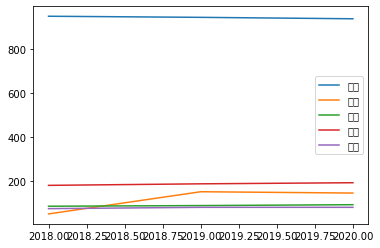

In [48]:
# 6. plot() - 데이터 시각화 
df3.plot()

#### plot 한글폰트 깨짐 처리 방법
- 데이터 시각화를 위한 matplotlib 라이브러리 활용

<AxesSubplot:>

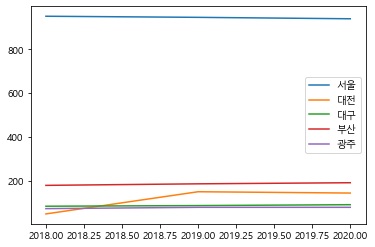

In [49]:
import matplotlib as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
df3.plot()

In [56]:
# 7. filter() - 원하는 데이터만 선택 
# 일부 인자의 값을 필수적으로 지정해야 함
# items, like regex 중 하나의 인자를 지정해야 함
# df3.filter(['서울']) # 서울 데이터(행)만 선택
# df3.filter(['서울', '부산']) # 서울, 부산 데이터만 선택
df3.filter([2018], axis = 0) # 2018년 데이터만 선택

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74


In [57]:
df3

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


#### 정규표현식 regular expression
- Ex) 대로 시작하는 도시만 모두 선택하고 싶다면?
- 문자열 패턴을 지정하는 방식의 꺾쇠 표시(^) 후 '대'
- Ex) 구로 끝나는 도시만 모두 선택하고 싶다면?
- '구' 하고 달러 표시($)

In [62]:
# df3.filter(['대전','대구'])
df3.filter(regex = '^대')

,대구
2018,85
2019,88
2020,92


In [60]:
# 2010년대 행만 선택
df3.filter(regex='^201', axis = 0)
# 기본적으로 컬럼 인덱스를 먼저 탐색하기 때문에 axis 지정

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80


In [61]:
# 10년 단위의 행만 선택(2000, 2010, 2020, 2030, ...)
df3.filter(regex = '0$', axis = 0)

,서울,대전,대구,부산,광주
2020,938.5,145,92,192,80


# 3-3차시

### 2.2.3. 데이터프레임 조회하기
- 데이터프레임은 출력될 때 깔끔하게 정렬되어 출력됨
- 조회하면 Series로 출력됨
- 컬럼인덱스: Class, Year, Price, Location
- 로우인덱스: C01, C02, C03, C04, C05

In [3]:
# 테스트 데이터프레임 생성
df4 = DataFrame({'Class': ['IoT','Network', 'Economy','Big Data', 'Cloud'],
                       'Year': [2018, 2017, 2018, 2018, 2019],
                       'Price': [100, 125, 132, 312, 250],
                       'Location': ['Korea','Korea', 'Korea', 'US','Korea']},
                      index=['C01','C02','C03', 'C04', 'C05'])
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


#### 특정 컬럼 선택
- 해당 변수의 이름 뒤에 대괄호 안에 색인하고자 하는 인덱스에 대한 정보 저장

In [8]:
# 1. 원하는 열(컬럼)만 조회하기
# 1-1) Class만 조회하기
df4['Class']
# df4['Class']의 결과는 Series라
# DataFrame만 사용가능한 info() 함수는 사용 불가

,Class
C01,IoT
C02,Network
C03,Economy
C04,Big Data
C05,Cloud


In [74]:
# 1-2) Class와 Price 조회하기
df4[['Class', 'Price']]
# list로 담아서 전달

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132
C04,Big Data,312
C05,Cloud,250


#### KeyError가 발생하는 이유
- 데이터프레임에서 색인을 하게 되면 컬럼인덱스로 가정
- loc: 문자인덱스로 조회
- iloc: 숫자인덱스로 조회
#### 함수가 아니라 특성이기 때문에 [] 대괄호 사용

In [10]:
# 2. 원하는 행(로우)만 조회하기 
df4.loc['C04']

Class       Big Data
Year            2018
Price            312
Location          US
Name: C04, dtype: object

In [77]:
df4.iloc[3]

Class       Big Data
Year            2018
Price            312
Location          US
Name: C04, dtype: object

In [78]:
# C02, C04 조회
df4.loc[['C02','C04']]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C04,Big Data,2018,312,US


#### 인덱스 슬라이싱
- 범위 값을 주고, 그 범위에 해당하는 데이터를 색인하는 방법
- 숫자, 문자 인덱스 모두 슬라이싱 가능
- 스타트 인덱스부터 엔드 인덱스까지의 범위 값에 해당하는 데이터 선택

In [80]:
# 3. 인덱스 슬라이싱 
# C02-C04까지의 강의 조회
# df4.loc['C02':'C04']
df4['C02':'C04']
# 인덱스 슬라이싱의 경우 loc, iloc 생략가능
# 컬럼 인덱스는 순서가 없기 때문

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [85]:
# df4에 색인 기호를 list로 담아서 전달하면
# 컬럼 인덱스를 찾게 됨
# df4[['C02','C03','C04']] # 에러 발생
df4.loc[['C02','C03','C04']]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [87]:
df4.iloc[1:4]
df4[1:4]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


#### 슬라이싱
- 순서가 있어야 범위 값 지정 가능
- 순서가 있는 것은 로우 인덱스 뿐
- loc나 iloc가 없어도 로우 인덱스로 바로 적용

In [92]:
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


#### 2개의 인덱스를 모두 사용하여 색인
- 기본적으로는 컬럼 인덱스를 우선적으로 색인
- 로우 인덱스로 색인하고 싶은 경우에는 loc / iloc 속성 사용
- 로우 먼저 컬럼 나중, 컬럼 먼저 로우 나중 등, 순서는 상관 X

In [13]:
# 4. 원하는 행과 열을 선택하여 조회하기 
# C02, C03 강의의 Class와 Year만 조회
df4[['Class','Year']].loc[['C02','C03']]
df4.loc[['C02','C03']][['Class','Year']]
df4[['Class','Year']]['C02':'C03']
df4.loc[['C02','C03'],['Class','Year']]
df4.loc['C02':'C03','Class':'Year']
df4.loc[:,'Class':'Price']

,Class,Year,Price
C01,IoT,2018,100
C02,Network,2017,125
C03,Economy,2018,132
C04,Big Data,2018,312
C05,Cloud,2019,250


In [101]:
df4.loc['C01']
# loc로 로우 인덱스 선택 -> 시리즈가 됨
# 인덱스 라벨 부여 -> 컬럼 인덱스 슬라이싱 가능

Class         IoT
Year         2018
Price         100
Location    Korea
Name: C01, dtype: object

In [103]:
# 5. 조건 색인 
# Price가 200 이상인 강의 선택
df4[df4['Price'] >= 200]

,Class,Year,Price,Location
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [105]:
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [107]:
# 아래 결과들이 출력되도록 코드를 완성하시오.
# 실습 1. 'Year' 컬럼만 선택
df4.Year # 특정 컬럼 하나만 선택할 때 사용

C01    2018
C02    2017
C03    2018
C04    2018
C05    2019
Name: Year, dtype: int64

In [108]:
# 실습 2. 'Class'와 'Location' 컬럼만 선택
df4[['Class', 'Location']]

,Class,Location
C01,IoT,Korea
C02,Network,Korea
C03,Economy,Korea
C04,Big Data,US
C05,Cloud,Korea


In [109]:
# 실습 3. C01과 C03 강의의 모든 컬럼 선택
df4.loc['C01':'C03']

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea


In [110]:
# 실습 4. C01~C03 강의의 Class와 Price만 선택
df4.loc['C01':'C03',['Class','Price']]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132


In [111]:
# 실습 4. 2019년도 강의만 조회
df4[df4.Year == 2019]

,Class,Year,Price,Location
C05,Cloud,2019,250,Korea


In [118]:
# 실습 5. 가장 가격이 비싼 강의 정보만 조회
df4[df4.Price == df4.Price.max()]

,Class,Year,Price,Location
C04,Big Data,2018,312,US


In [122]:
# 실습 6. 2018, 2019년도에 개설된 강의 조회
df4[df4.Year.isin([2018,2019])]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


#### and 연산: & 사용
- 주의! 각각의 조건을 괄호로 묶기

In [127]:
# 실습 7. 2018년도에 한국에서 개설된 강의 조회
df4[(df4.Location == 'Korea') & (df4.Year == 2018)]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


## 데이터프레임 규칙

#### 색인은 무조건 컬럼 인덱스를 우선한다
- 컬럼인덱스: 색인
- 로우인덱스: loc, iloc 사용

#### 인덱스 슬라이싱은 로우 인덱스에만 적용이 가능하다
- 인덱스가 슬라이싱 형태로 지정된 경우는 loc, iloc 생략 가능

# 4-1차시

### 1. 데이터프레임에 새로운 컬럼 추가하기

- 1) 고정 값 할당하기
- 2) 기존 컬럼에 함수를 적용한 결과 할당하기
- 3) 기존 컬럼들의 산술 연산 결과 할당하기

In [8]:
# 컬럼 추가하기 1
# limitStudent 컬럼(정원)을 추가하고, 값을 모두 30으로 저장
# 할당값을 변경하고 싶을 땐 동일한 구문을 작성하면 됨
df4['limitStudent'] = 40
df4

,Class,Year,Price,Location,limitStudent
C01,IoT,2018,100,Korea,40
C02,Network,2017,125,Korea,40
C03,Economy,2018,132,Korea,40
C04,Big Data,2018,312,US,40
C05,Cloud,2019,250,Korea,40


In [12]:
# 컬럼 추가하기 2.
# numStudent 컬럼(수강학생수)을 추가하고, 값을 25,30,10,23,17로 저장 
# 새로운 컬럼을 추가할 경우, 원본 행의 개수와 신규할당값의 개수가 같아야함
df4['numStudent'] = [25, 30, 10, 23, 17]
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,40,25
C02,Network,2017,125,Korea,40,30
C03,Economy,2018,132,Korea,40,10
C04,Big Data,2018,312,US,40,23
C05,Cloud,2019,250,Korea,40,17


In [14]:
# 컬럼 추가하기 3 (기존 컬럼에 함수를 적용한 결과로 값을 할당하기)
# priceLevel 컬럼을 추가하고, 
# Price가 200과 같거나 크면, High, 200보다 작으면 Low

# 함수 생성
def get_plevel(x):
    if x >= 200:
        return 'High'
    else:
        return 'Low'

In [15]:
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,40,25
C02,Network,2017,125,Korea,40,30
C03,Economy,2018,132,Korea,40,10
C04,Big Data,2018,312,US,40,23
C05,Cloud,2019,250,Korea,40,17


In [20]:
# apply() 함수 --> 함수를 적용하기 위한 함수
# sum() 함수: 더하기 함수, 각 컬럼별로 더하기 연산을 수행함
# df4.sum() => df4.apply('sum')
df4.apply(lambda x: x.sum())

Class           IoTNetworkEconomyBig DataCloud
Year                                     10090
Price                                      919
Location                KoreaKoreaKoreaUSKorea
limitStudent                               200
numStudent                                 105
dtype: object

In [28]:
df4.apply(lambda x: get_plevel(x.Price), axis = 1)

C01     Low
C02     Low
C03     Low
C04    High
C05    High
dtype: object

In [55]:
# df4.apply('get_plevel') => 오류
# 컬럼 단위로 돌면서 apply함수 순회
# 어떤 특정 컬럼의 각각의 값에 새로운 값들을 할당하고 싶으면 익명함수 적용
# 로우 단위로 순회하고 싶은 경우, axis 인자 사용
df4['priceLevel'] = df4.apply(lambda x: get_plevel(x.Price), axis = 1)
df4

,Class,Year,Price,Location,limitStudent,numStudent,income,rate,priceLevel
C01,IoT,2018,100,Korea,40,25,2500,62.5,Low
C02,Network,2017,125,Korea,40,30,3750,75.0,Low
C03,Economy,2018,132,Korea,40,10,1320,25.0,Low
C04,Big Data,2018,312,US,40,23,7176,57.5,High
C05,Cloud,2019,250,Korea,40,17,4250,42.5,High


In [30]:
# 컬럼 추가하기 4 (기존 컬럼을 이용하여 새 컬럼 추가하기)
# income 컬럼을 추가하고, Price와 numStudent의 값을 곱한 값으로 할당
df4['income'] = df4.Price * df4.numStudent
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income
C01,IoT,2018,100,Korea,40,25,Low,2500
C02,Network,2017,125,Korea,40,30,Low,3750
C03,Economy,2018,132,Korea,40,10,Low,1320
C04,Big Data,2018,312,US,40,23,High,7176
C05,Cloud,2019,250,Korea,40,17,High,4250


In [ ]:
# 산술 연산

In [31]:
#1 두 값의 연산
5+10

15

In [32]:
#2 1차원 데이터와 값 간의 연산
sr = Series([3,5,7,9])

In [33]:
sr + 100

0    103
1    105
2    107
3    109
dtype: int64

- 시리즈의 연산은 각 행별로 수행됨
- 1차원 데이터들간의 산술 연산은 같은 인덱스 라벨의 값들끼리 연산 수행

In [37]:
# 실습. rate 컬럼을 추가하고, 충원율을 계산하여 할당. 
# 충원율은 정원(limitStudent) 대비 수강학생수(numStudent) 비율
df4['rate'] = df4.numStudent/df4.limitStudent*100
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,40,25,Low,2500,62.5
C02,Network,2017,125,Korea,40,30,Low,3750,75.0
C03,Economy,2018,132,Korea,40,10,Low,1320,25.0
C04,Big Data,2018,312,US,40,23,High,7176,57.5
C05,Cloud,2019,250,Korea,40,17,High,4250,42.5


In [44]:
# 반올림 함수 round(): 소수점 몇 번째 자리에서 반올림할건지를 인자로 줌
df4.round({'rate':0})

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,40,25,Low,2500,62.0
C02,Network,2017,125,Korea,40,30,Low,3750,75.0
C03,Economy,2018,132,Korea,40,10,Low,1320,25.0
C04,Big Data,2018,312,US,40,23,High,7176,57.0
C05,Cloud,2019,250,Korea,40,17,High,4250,42.0


### 2. 불필요한 컬럼이나 데이터 삭제하기

In [45]:
# drop()
# 첫번째 인자: 삭제하고자 하는 인덱스명
# 두번째 인자: axis (0 or 1)

In [49]:
# C05 강의 삭제, 0: 로우인덱스
df4.drop('C05', 0)

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,40,25,Low,2500,62.5
C02,Network,2017,125,Korea,40,30,Low,3750,75.0
C03,Economy,2018,132,Korea,40,10,Low,1320,25.0
C04,Big Data,2018,312,US,40,23,High,7176,57.5


In [56]:
# priceLevel 삭제, 1: 컬럼인덱스
# inplace True: 결과가 원본 데이터에 반영됨
# df4 = df4.drop('priceLevel', 1)
df4.drop('priceLevel', 1, inplace = True)

In [57]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,40,25,2500,62.5
C02,Network,2017,125,Korea,40,30,3750,75.0
C03,Economy,2018,132,Korea,40,10,1320,25.0
C04,Big Data,2018,312,US,40,23,7176,57.5
C05,Cloud,2019,250,Korea,40,17,4250,42.5


In [63]:
# 실습. 수강생이 가장 작은 클래스를 찾아서 삭제
# df4.drop('C03', 0)
del_class = df4[df4.numStudent == df4.numStudent.min()]
del_class.index

Index(['C03'], dtype='object')

In [64]:
df4.drop(del_class.index, 0)

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,40,25,2500,62.5
C02,Network,2017,125,Korea,40,30,3750,75.0
C04,Big Data,2018,312,US,40,23,7176,57.5
C05,Cloud,2019,250,Korea,40,17,4250,42.5
